In [1]:
import os
import numpy as np
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/data/'

Mounted at /content/gdrive


In [3]:
CLASSES = ['speed', 'direction', 'other']

In [4]:
# Image parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [5]:
# Load Dataset and Extract HOG Features
def load_data_and_extract_hog(data_path, img_height, img_width, classes):
    hog_features = []
    labels = []
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(data_path, 'Train', class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path):  # Ensure it's a file
                # Read and resize the image
                img = imread(img_path)
                img_resized = resize(img, (img_height, img_width), anti_aliasing=True, mode='reflect')

                # Convert to grayscale for HOG
                if img_resized.ndim == 3:
                    img_resized = img_resized.mean(axis=-1)

                # Extract HOG features
                hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                hog_features.append(hog_feature)
                labels.append(idx)
    return np.array(hog_features), np.array(labels)

X, y = load_data_and_extract_hog(path, IMG_HEIGHT, IMG_WIDTH, CLASSES)

In [6]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train SVM Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [8]:
# Make Predictions
y_pred = svm_clf.predict(X_test)

In [9]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[75  2  4]
 [ 0 70  3]
 [ 0  2 83]]


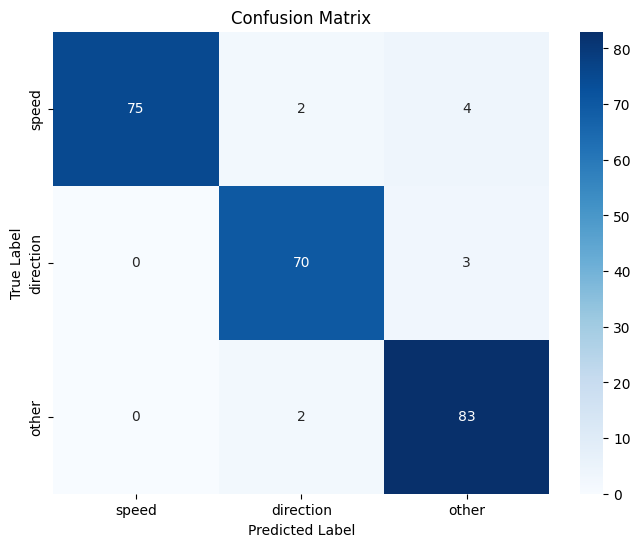

In [11]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=CLASSES))


Classification Report:
              precision    recall  f1-score   support

       speed       1.00      0.93      0.96        81
   direction       0.95      0.96      0.95        73
       other       0.92      0.98      0.95        85

    accuracy                           0.95       239
   macro avg       0.96      0.95      0.95       239
weighted avg       0.96      0.95      0.95       239



In [13]:
# Test with Random Image
def test_random_image(image_path, model, img_height, img_width):
    # Read and preprocess image
    img = imread(image_path)
    img_resized = resize(img, (img_height, img_width), anti_aliasing=True, mode='reflect')

    # Convert to grayscale for HOG
    if img_resized.ndim == 3:
        img_resized = img_resized.mean(axis=-1)

    # Extract HOG features
    hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_feature = np.expand_dims(hog_feature, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(hog_feature)[0]
    prediction_proba = model.predict_proba(hog_feature)[0]

    # Display Result
    plt.imshow(img)
    plt.title(f"Predicted: {CLASSES[prediction]} (Confidence: {np.max(prediction_proba):.2f})")
    plt.axis('off')
    plt.show()

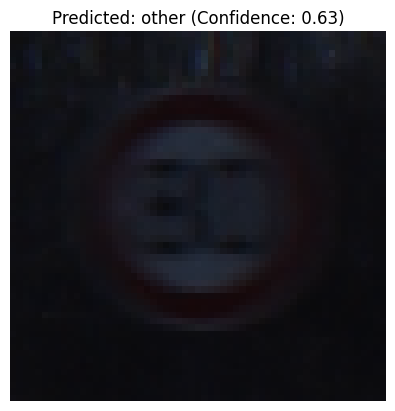

In [27]:
# Test
random_image_path = os.path.join(path, 'Test/speed071.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, svm_clf, IMG_HEIGHT, IMG_WIDTH)

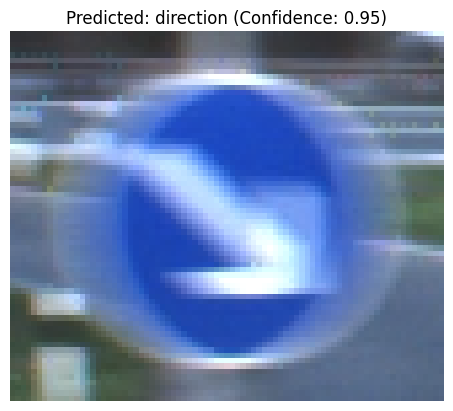

In [20]:
random_image_path = os.path.join(path, 'Test/direction064.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, svm_clf, IMG_HEIGHT, IMG_WIDTH)

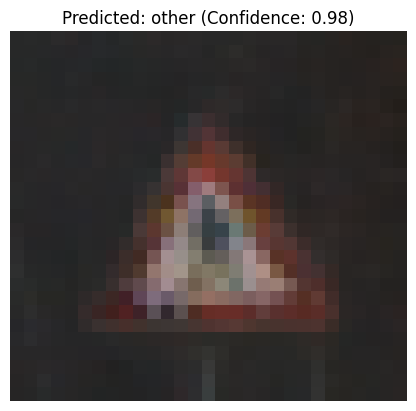

In [18]:
random_image_path = os.path.join(path, 'Test/other086.png')  # Replace with speedxxx.png, directionxxx.png or otherxxx.png (xxx from 001-100)
test_random_image(random_image_path, svm_clf, IMG_HEIGHT, IMG_WIDTH)